## The exploration of the 40 mice annotated

This notebook is used to explore the data of the 40 mice annotated. Those annotation allow us to have a new insight on the data and also to have a better understanding of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as m
import matplotlib.pyplot as plt

import os
import pickle

import sys
sys.path.append('../Library')
import dataProcessing as dp
import breedManip as bm

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('/home/magali.egger/shared-projects/mice_UNIL/Data/df_nofilter_labels.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head()

,Unnamed: 0,rawState,state,EEGv,EMGv,epoch,day,spectral_flatness,spectral_centroid,spectral_entropy,...,EEGv_log,EMGv_log,bias,EEGv^2,EEGv^3,EMGv^2,EMGv^3,mouse,breed,label
0,99,n,n,7.116438e-09,2.315795e-10,99,0,0.054175,9.400168,-5.994889,...,-18.760859,-22.186098,1,5.064369e-17,3.604026e-25,5.362906e-20,1.241939e-29,09003,bxd_090,n
1,100,n,n,6.789003e-09,1.883032e-10,100,0,0.075867,9.576805,-5.910677,...,-18.807962,-22.392967,1,4.609056e-17,3.129089e-25,3.545811e-20,6.676878e-30,09003,bxd_090,n
2,101,n,n,5.345885e-09,1.965400e-10,101,0,0.082830,10.181243,-5.931538,...,-19.046939,-22.350155,1,2.857849e-17,1.527773e-25,3.862797e-20,7.591942e-30,09003,bxd_090,n
3,102,n,n,8.861552e-09,1.982735e-10,102,0,0.052586,7.561301,-5.506340,...,-18.541544,-22.341374,1,7.852710e-17,6.958720e-25,3.931238e-20,7.794603e-30,09003,bxd_090,n
4,103,n,n,6.617297e-09,2.121310e-10,103,0,0.068133,8.691670,-5.728127,...,-18.833579,-22.273817,1,4.378862e-17,2.897624e-25,4.499956e-20,9.545802e-30,09003,bxd_090,n


In [4]:
df['label'].value_counts()

w    1529516
n    1337654
1     280491
r     173605
2      37482
3      10439
8       5224
5       4895
4       2069
9        938
6        542
s        382
a          2
j          1
Name: label, dtype: int64

In [5]:
df = df[df['label'].isin(['r', '6'])]

<Axes: xlabel='label', ylabel='EEGv'>

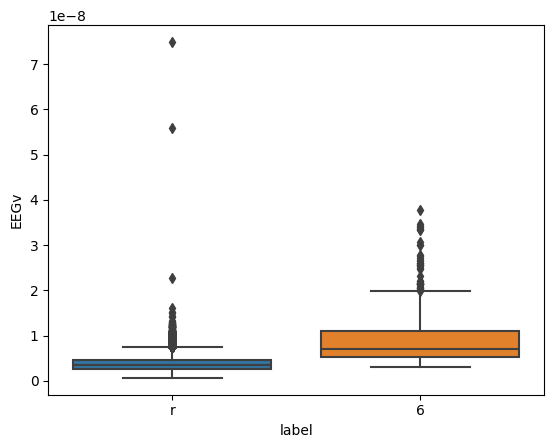

In [6]:
# display EEGv boxplot for each label
sns.boxplot(x='label', y='EEGv', data=df)

<Axes: xlabel='label', ylabel='EEGv'>

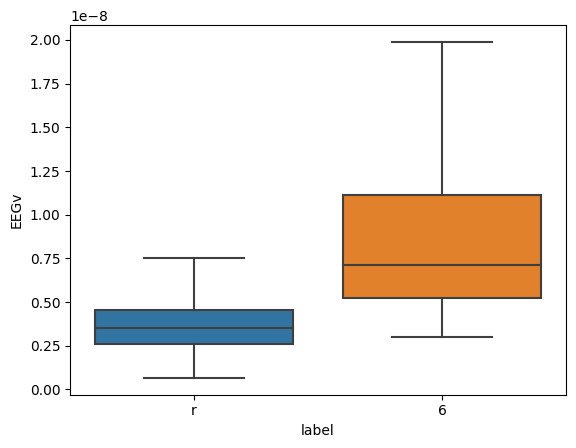

In [23]:
# display EEGv boxplot for each label with outliers
sns.boxplot(x='label', y='EEGv', data=df, showfliers=False)


<Axes: xlabel='label', ylabel='EEGv'>

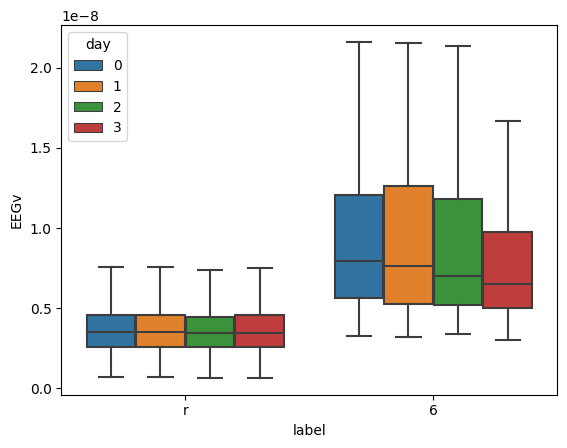

In [24]:
# plot the EEGv boxplot for each label for each day
sns.boxplot(x='label', y='EEGv', hue='day', data=df, showfliers=False)


In [24]:
# keep only the r and 6 labels
df_rem = df[df['label'].isin(['r', '6'])]

<Axes: xlabel='label', ylabel='EEGv'>

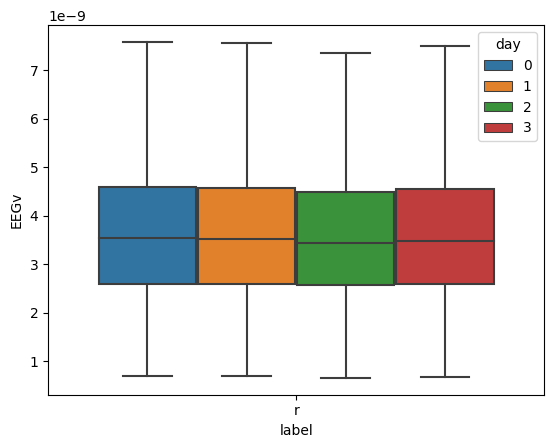

In [26]:
# plot the EEGv boxplot for each label for each day
sns.boxplot(x='label', y='EEGv', hue='day', data=df_rem, showfliers=False)

<Axes: xlabel='label', ylabel='EMGv'>

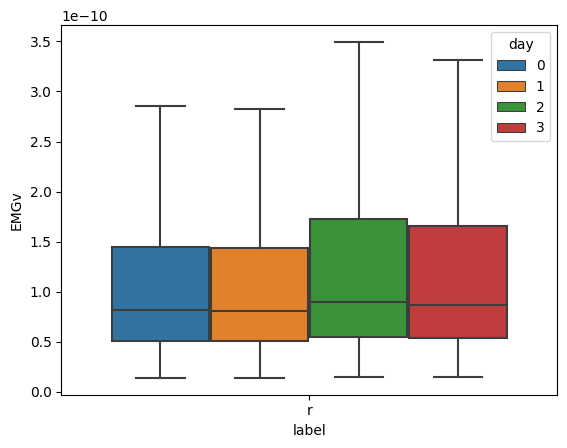

In [27]:
# plot the EMGv boxplot for each label for each day
sns.boxplot(x='label', y='EMGv', hue='day', data=df_rem, showfliers=False)

In [28]:
# when the rawState is s, what's the value of the column state?
df[df['rawState'] == 's']['state'].value_counts()


Series([], Name: state, dtype: int64)

In [29]:
df['state'].value_counts()

r    152872
n     11203
w     10072
Name: state, dtype: int64

In [30]:
df['rawState'].value_counts()

r    152427
n     11113
w     10057
3       374
2        90
6        71
1        15
Name: rawState, dtype: int64

In [3]:
with open('/home/magali.egger/shared-projects/mice_UNIL/Data/df_full_noFilter.pkl', 'rb') as f:
    df_full = pickle.load(f)

In [15]:
df_full['state'].value_counts()

w    11296174
n     8898842
r     1202651
8         784
s         329
9         208
a           3
j           1
Name: state, dtype: int64

In [16]:
df_full['rawState'].value_counts()

w    10843028
n     8847974
r     1186746
1      449745
2       47049
3       15176
5        3819
4        3401
8         784
6         729
s         329
9         208
a           3
j           1
Name: rawState, dtype: int64

In [18]:
print(len(df_full.index))
print(len(df.index))

21398992
3383240


In [9]:
len(df_full['mouse'].unique())

252

In [19]:
mice_annotated = ['BL601', 'BL602', 'BL606', 'BL609', '1D203', '2D203', '1D204', '1D206', '00505', '04501', '04502', '04504', '04505', '04506', '04508', '04801', '04802', '04803', '04804', '04805', '04806', '05001', '05002', '05003', '05004', '05005', '05006', '07901', '07902', '08405', '08502', '08503', '08901', '08902', '09001', '09003', '09004', '09005', '09006', '09007', '10101', '10102']
df_full_mice = df_full[df_full['mouse'].isin(mice_annotated)]

In [20]:
print(len(df_full_mice.index))

3383240


In [21]:
df_full_mice['state'].value_counts()

w    1788137
n    1404626
r     189449
8        784
9        208
s         36
Name: state, dtype: int64

In [4]:
with open('/home/magali.egger/shared-projects/mice_UNIL/Data/df_simplify_labels.pkl', 'rb') as f:
    df = pickle.load(f)

In [5]:
df['converted'] = df['label']
# convert the labels to n, r, w
df['converted'] = df['converted'].replace(['1', '4', '9'], 'w')
df['converted'] = df['converted'].replace(['2', '5'], 'n')
df['converted'] = df['converted'].replace(['3', '6'], 'r')
# remove the other labels 's','7','8','a','j'
df = df[df['converted'].isin(['n', 'r', 'w'])]

In [23]:
df_day0 = df[df['day'] == 0]
df_day1 = df[df['day'] == 1]
df_day2 = df[df['day'] == 2]
df_day3 = df[df['day'] == 3]

In [ ]:
proportion_sleep = []
for mouse in insomniac_mice:
    if mouse == '29T11' or mouse == '04307':
        continue
    df = df_day3[df_day3['mouse'] == mouse]
    lines_sleep = df[df['state'] == 'w'].shape[0]
    print(f"{mouse} : {lines_sleep} / {df.shape[0]} = {lines_sleep / df.shape[0] *100} %")

### New insight

In [6]:
with open('/home/magali.egger/shared-projects/mice_UNIL/Data/df_nofilter_labels.pkl', 'rb') as f:
    df = pickle.load(f)

In [7]:
df['label'].value_counts()

w    1529516
n    1337654
1     280491
r     173605
2      37482
3      10439
8       5224
5       4895
4       2069
9        938
6        542
s        382
a          2
j          1
Name: label, dtype: int64

In [8]:
df['converted'] = df['label']
# convert the labels to n, r, w
df['converted'] = df['converted'].replace(['1', '4', '9'], 'w')
df['converted'] = df['converted'].replace(['2', '5'], 'n')
df['converted'] = df['converted'].replace(['3', '6'], 'r')
# remove the other labels 's','7','8','a','j'
df = df[df['converted'].isin(['n', 'r', 'w'])]

In [9]:
df['converted'].value_counts()

w    1813014
n    1380031
r     184586
Name: converted, dtype: int64

In [10]:
len(df['mouse'].unique())

40

In [11]:
# compute the percentage of NREM sleep for each mouse and then the mean of all mice
proportion_n = []

for mouse in df['mouse'].unique():
    df_mouse = df[df['mouse'] == mouse]
    lines_sleep = df_mouse[df_mouse['converted'] == 'n'].shape[0]
    proportion_n.append(lines_sleep / df_mouse.shape[0] * 100)

print(f"Mean of NREM sleep : {np.mean(proportion_n)} %")

Mean of NREM sleep : 40.85560673217932 %


In [12]:
proportion_r = []

for mouse in df['mouse'].unique():
    df_mouse = df[df['mouse'] == mouse]
    lines_sleep = df_mouse[df_mouse['converted'] == 'r'].shape[0]
    proportion_r.append(lines_sleep / df_mouse.shape[0] * 100)

print(f"Mean of REM sleep : {np.mean(proportion_r)} %")

Mean of REM sleep : 5.466143641584134 %


In [13]:
proportion_w = []

for mouse in df['mouse'].unique():
    df_mouse = df[df['mouse'] == mouse]
    lines_sleep = df_mouse[df_mouse['converted'] == 'w'].shape[0]
    proportion_w.append(lines_sleep / df_mouse.shape[0] * 100)

print(f"Mean of wake : {np.mean(proportion_w)} %")

Mean of wake : 53.67824962623655 %


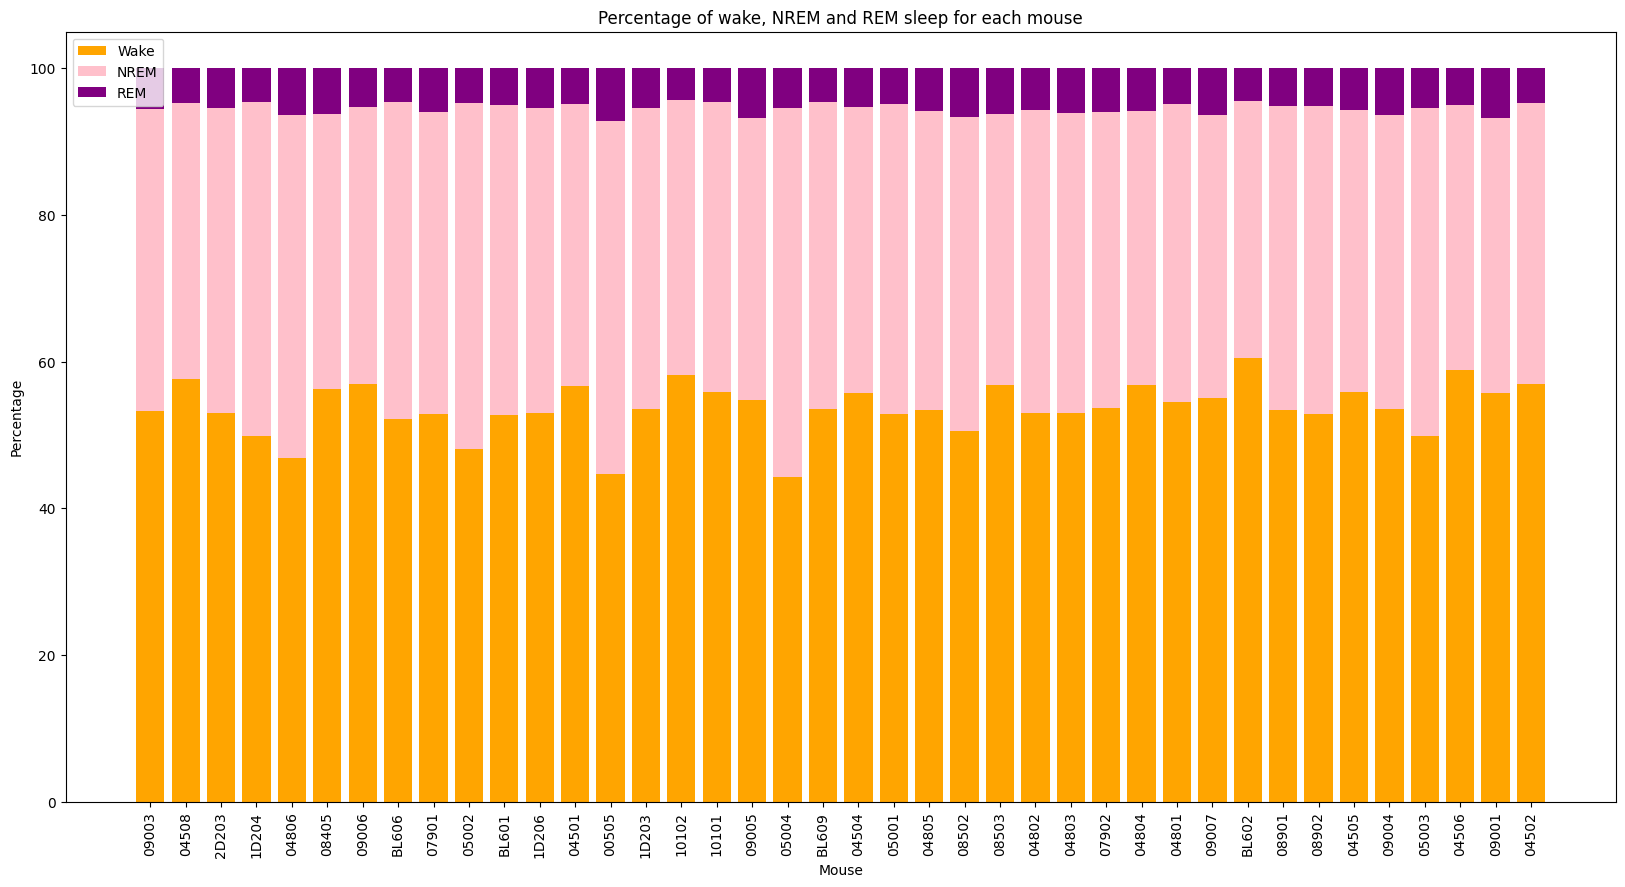

In [23]:
# plot the percentage of wake, nrem and rem for each mouse so one bar reaches 100%
plt.figure(figsize=(20, 10))
plt.bar(df['mouse'].unique(), proportion_w, label='Wake', color = 'orange')
plt.bar(df['mouse'].unique(), proportion_n, bottom=proportion_w, label='NREM', color = 'pink')
plt.bar(df['mouse'].unique(), proportion_r, bottom=np.array(proportion_w) + np.array(proportion_n), label='REM', color = 'purple')
plt.legend()
plt.title('Percentage of wake, NREM and REM sleep for each mouse')
plt.xlabel('Mouse')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.show()

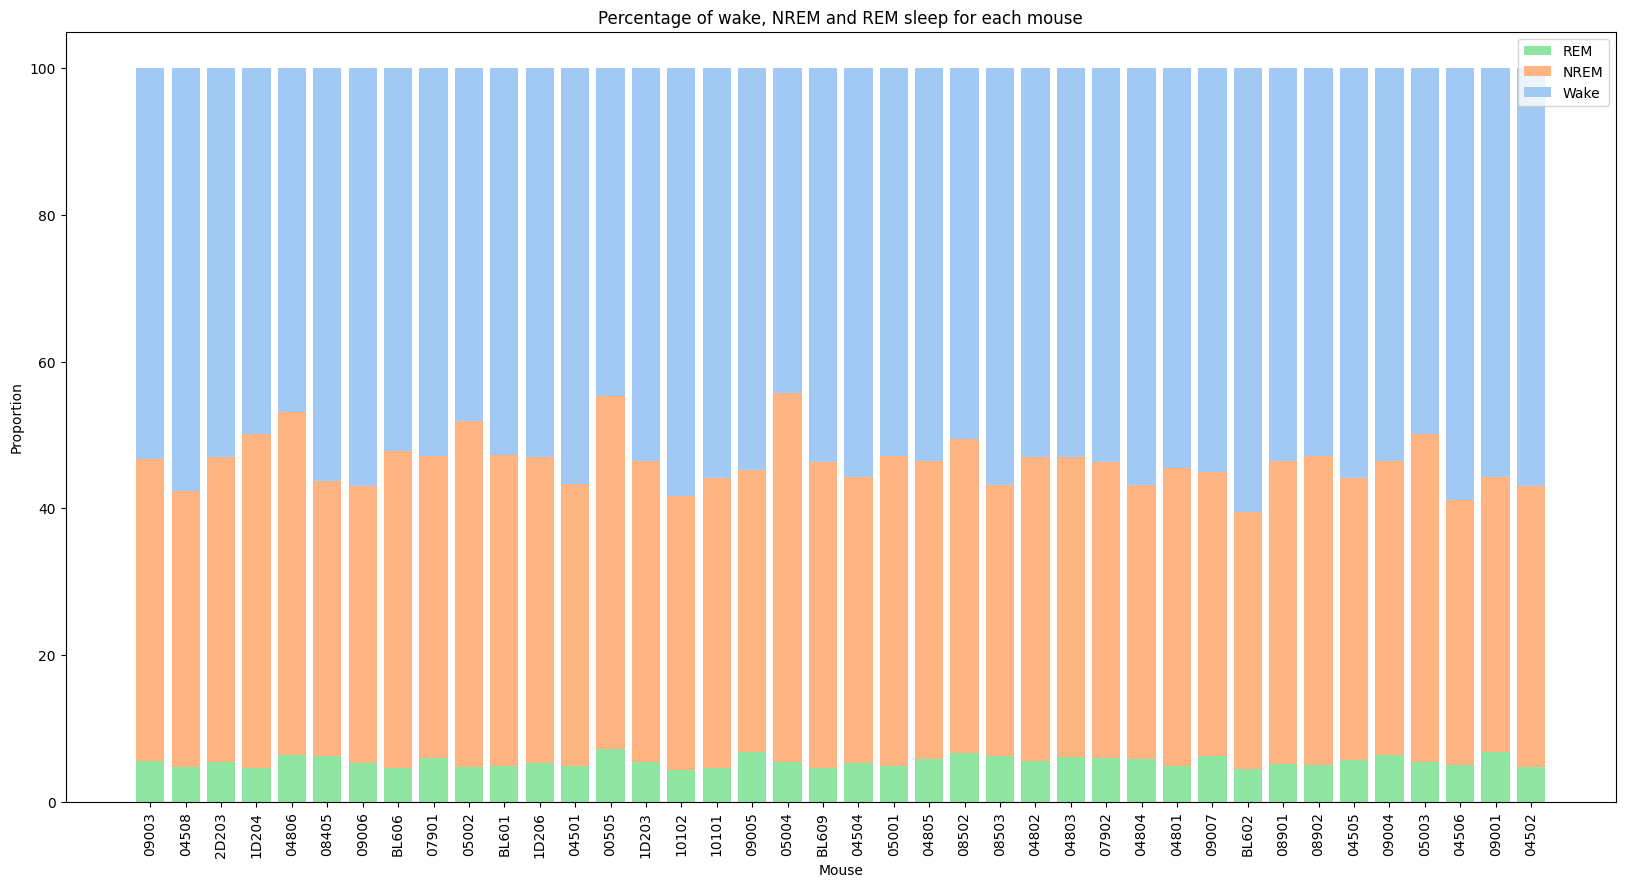

In [20]:
plt.figure(figsize=(20, 10))
palette = sns.color_palette("pastel")
plt.bar(df['mouse'].unique(), proportion_r, label='REM', color = palette.as_hex()[2])
plt.bar(df['mouse'].unique(), proportion_n, bottom=proportion_r, label='NREM', color = palette.as_hex()[1])
plt.bar(df['mouse'].unique(), proportion_w, bottom=np.array(proportion_r) + np.array(proportion_n), label='Wake', color = palette.as_hex()[0])
plt.legend()
plt.title('Percentage of wake, NREM and REM sleep for each mouse')
plt.xlabel('Mouse')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


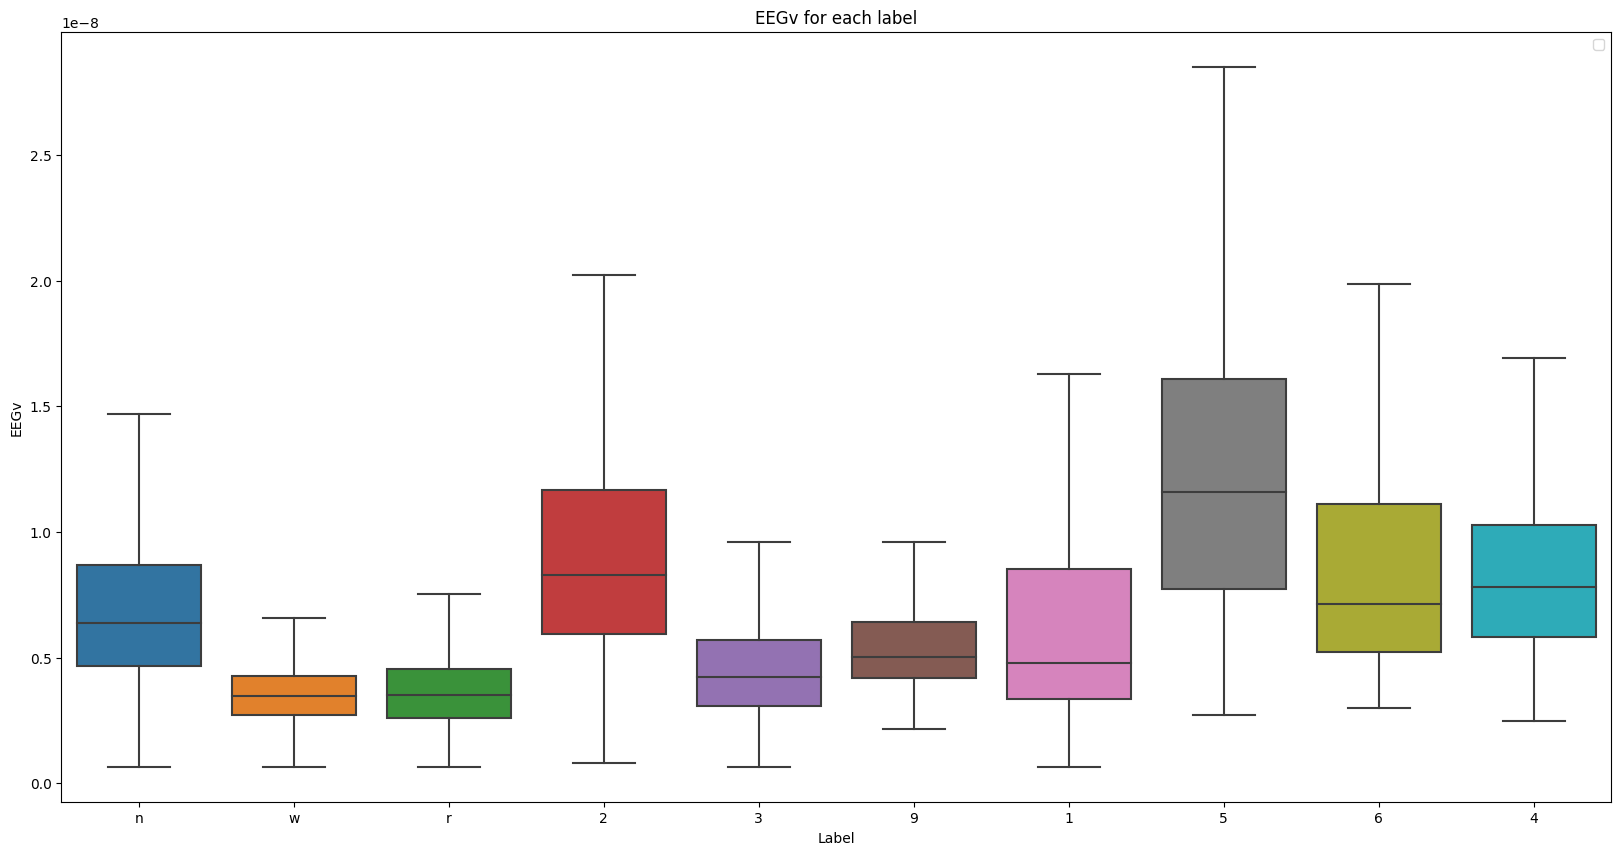

In [6]:
# make a boxplot of the EEGv for each label
plt.figure(figsize=(20, 10))
sns.boxplot(x='label', y='EEGv', data=df, showfliers=False)
plt.title('EEGv for each label')
plt.xlabel('Label')
plt.ylabel('EEGv')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


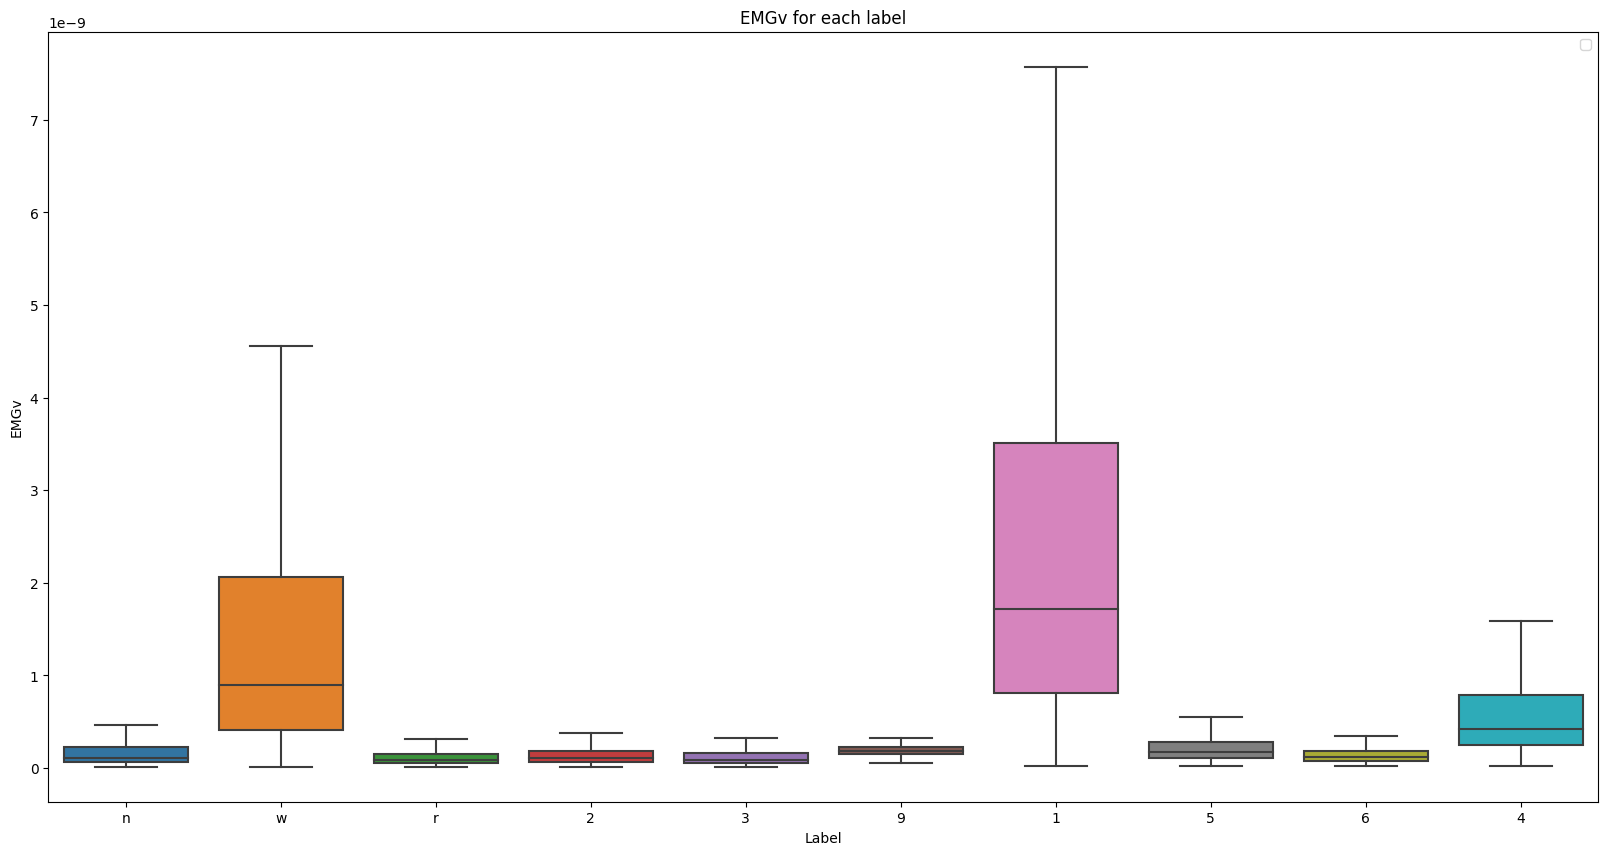

In [32]:
# make a boxplot of the EMGv for each label
plt.figure(figsize=(20, 10))
sns.boxplot(x='label', y='EMGv', data=df, showfliers=False)
plt.title('EMGv for each label')
plt.xlabel('Label')
plt.ylabel('EMGv')  
plt.legend()
plt.show()

In [9]:
df_rem = df[df['label'].isin(['r', '6', '3'])]
df_rem['converted'] = df_rem['label'].replace(['r', '6'], 'r')

In [10]:
df_rem.columns

Index(['Unnamed: 0', 'rawState', 'state', 'EEGv', 'EMGv', 'epoch', 'day',
       'spectral_flatness', 'spectral_centroid', 'spectral_entropy',
       'spectral_rolloff_0.1', 'spectral_rolloff_0.2', 'spectral_rolloff_0.3',
       'spectral_rolloff_0.4', 'spectral_rolloff_0.5', 'spectral_rolloff_0.6',
       'spectral_rolloff_0.7', 'spectral_rolloff_0.8', 'spectral_rolloff_0.9',
       'EEGv_mean2', 'EMGv_mean2', 'EEGv_median2', 'EMGv_median2', 'EEGv_var2',
       'EMGv_var2', 'EEGv_min2', 'EMGv_min2', 'EEGv_max2', 'EMGv_max2',
       'EEGv_mean5', 'EMGv_mean5', 'EEGv_median5', 'EMGv_median5', 'EEGv_var5',
       'EMGv_var5', 'EEGv_min5', 'EMGv_min5', 'EEGv_max5', 'EMGv_max5',
       'EEGv_mean10', 'EMGv_mean10', 'EEGv_median10', 'EMGv_median10',
       'EEGv_var10', 'EMGv_var10', 'EEGv_min10', 'EMGv_min10', 'EEGv_max10',
       'EMGv_max10', 'EEGv_mean20', 'EMGv_mean20', 'EEGv_median20',
       'EMGv_median20', 'EEGv_var20', 'EMGv_var20', 'EEGv_min20', 'EMGv_min20',
       'EEGv_max20',

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


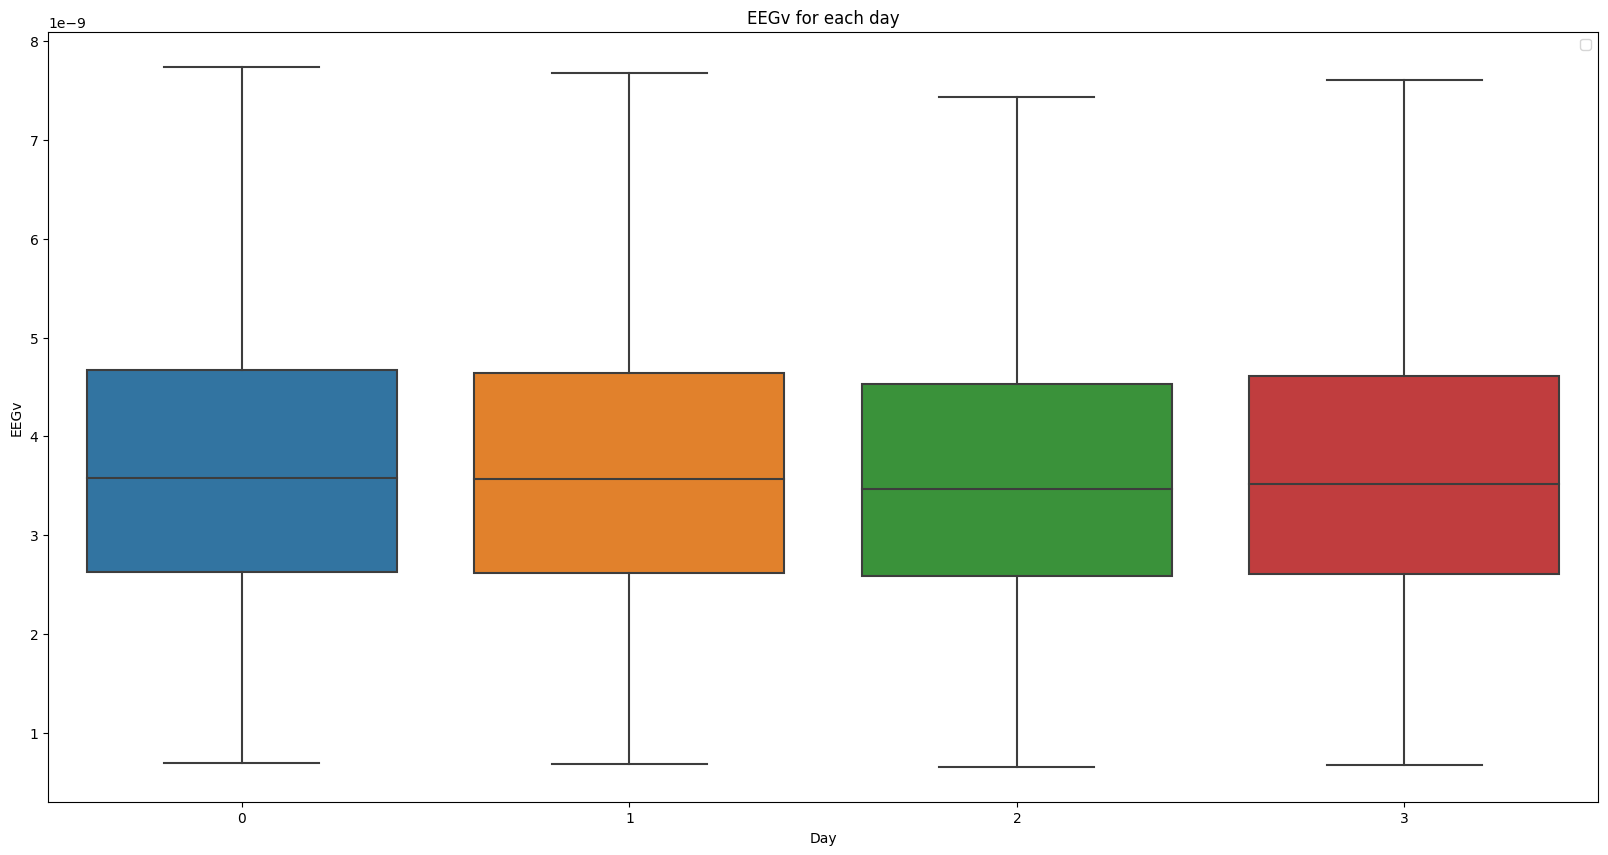

In [11]:
# make a boxplot of the EEGv for each day of df_rem
plt.figure(figsize=(20, 10))
sns.boxplot(x='day', y='EEGv', data=df_rem, showfliers=False)
plt.title('EEGv for each day')
plt.xlabel('Day')
plt.ylabel('EEGv')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


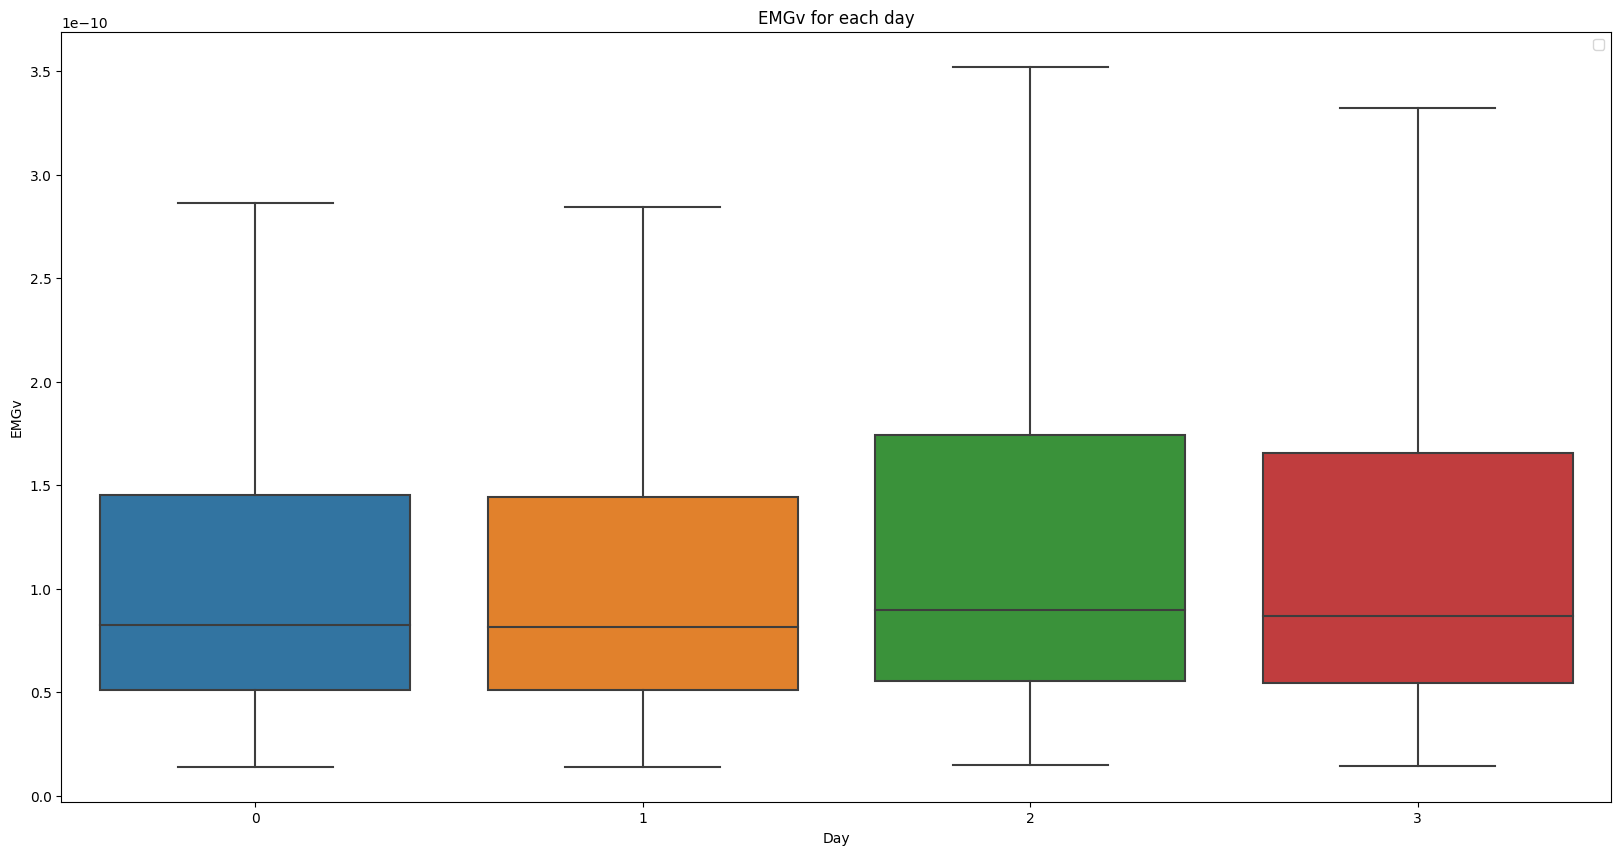

In [13]:
# make a boxplot of the EMGv for each day of df_rem
plt.figure(figsize=(20, 10))
sns.boxplot(x='day', y='EMGv', data=df_rem, showfliers=False)
plt.title('EMGv for each day')
plt.xlabel('Day')
plt.ylabel('EMGv')
plt.legend()
plt.show()

In [29]:
# compute the number of rem in each day for each mouse

df_day0 = df[df['day'] == 0]
df_day1 = df[df['day'] == 1]
df_day2 = df[df['day'] == 2]
df_day3 = df[df['day'] == 3]

nb_rem_day0 = len(df_day0[df_day0['converted'] == 'r'].index)
nb_rem_day1 = len(df_day1[df_day1['converted'] == 'r'].index)
nb_rem_day2 = len(df_day2[df_day2['converted'] == 'r'].index)
nb_rem_day3 = len(df_day3[df_day3['converted'] == 'r'].index)


In [18]:
print(f"Day 0 : {nb_rem_day0}")
print(f"Day 1 : {nb_rem_day1}")
print(f"Day 2 : {nb_rem_day2}")
print(f"Day 3 : {nb_rem_day3}")

Day 0 : 47518
Day 1 : 48469
Day 2 : 41238
Day 3 : 47361


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


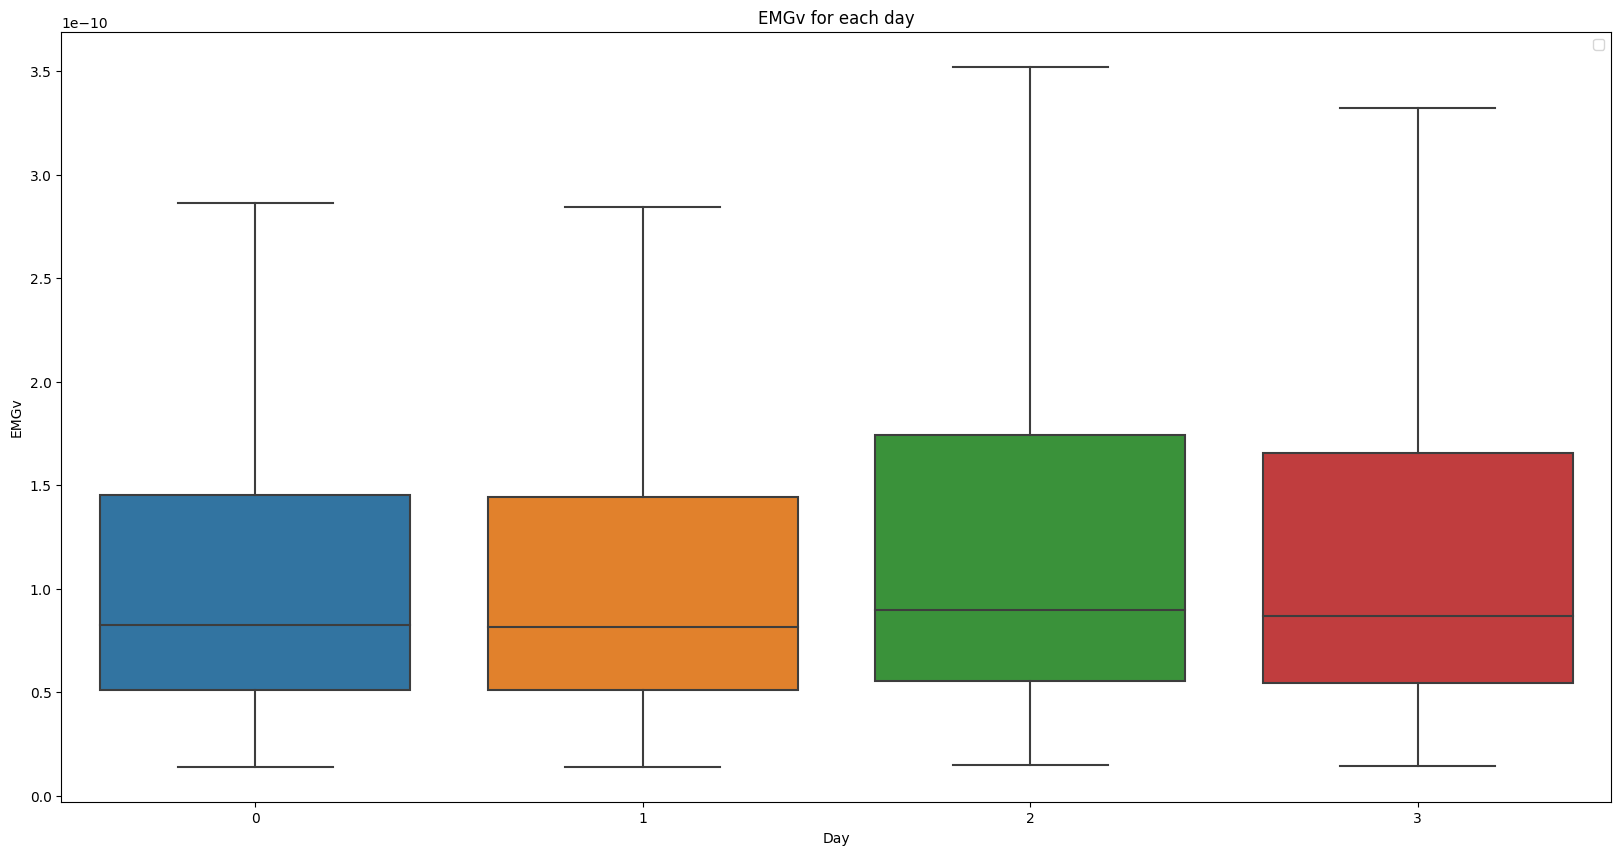

In [19]:
# display the EMGv boxplot for each day
plt.figure(figsize=(20, 10))
sns.boxplot(x='day', y='EMGv', data=df_rem, showfliers=False)
plt.title('EMGv for each day')
plt.xlabel('Day')
plt.ylabel('EMGv')
plt.legend()
plt.show()

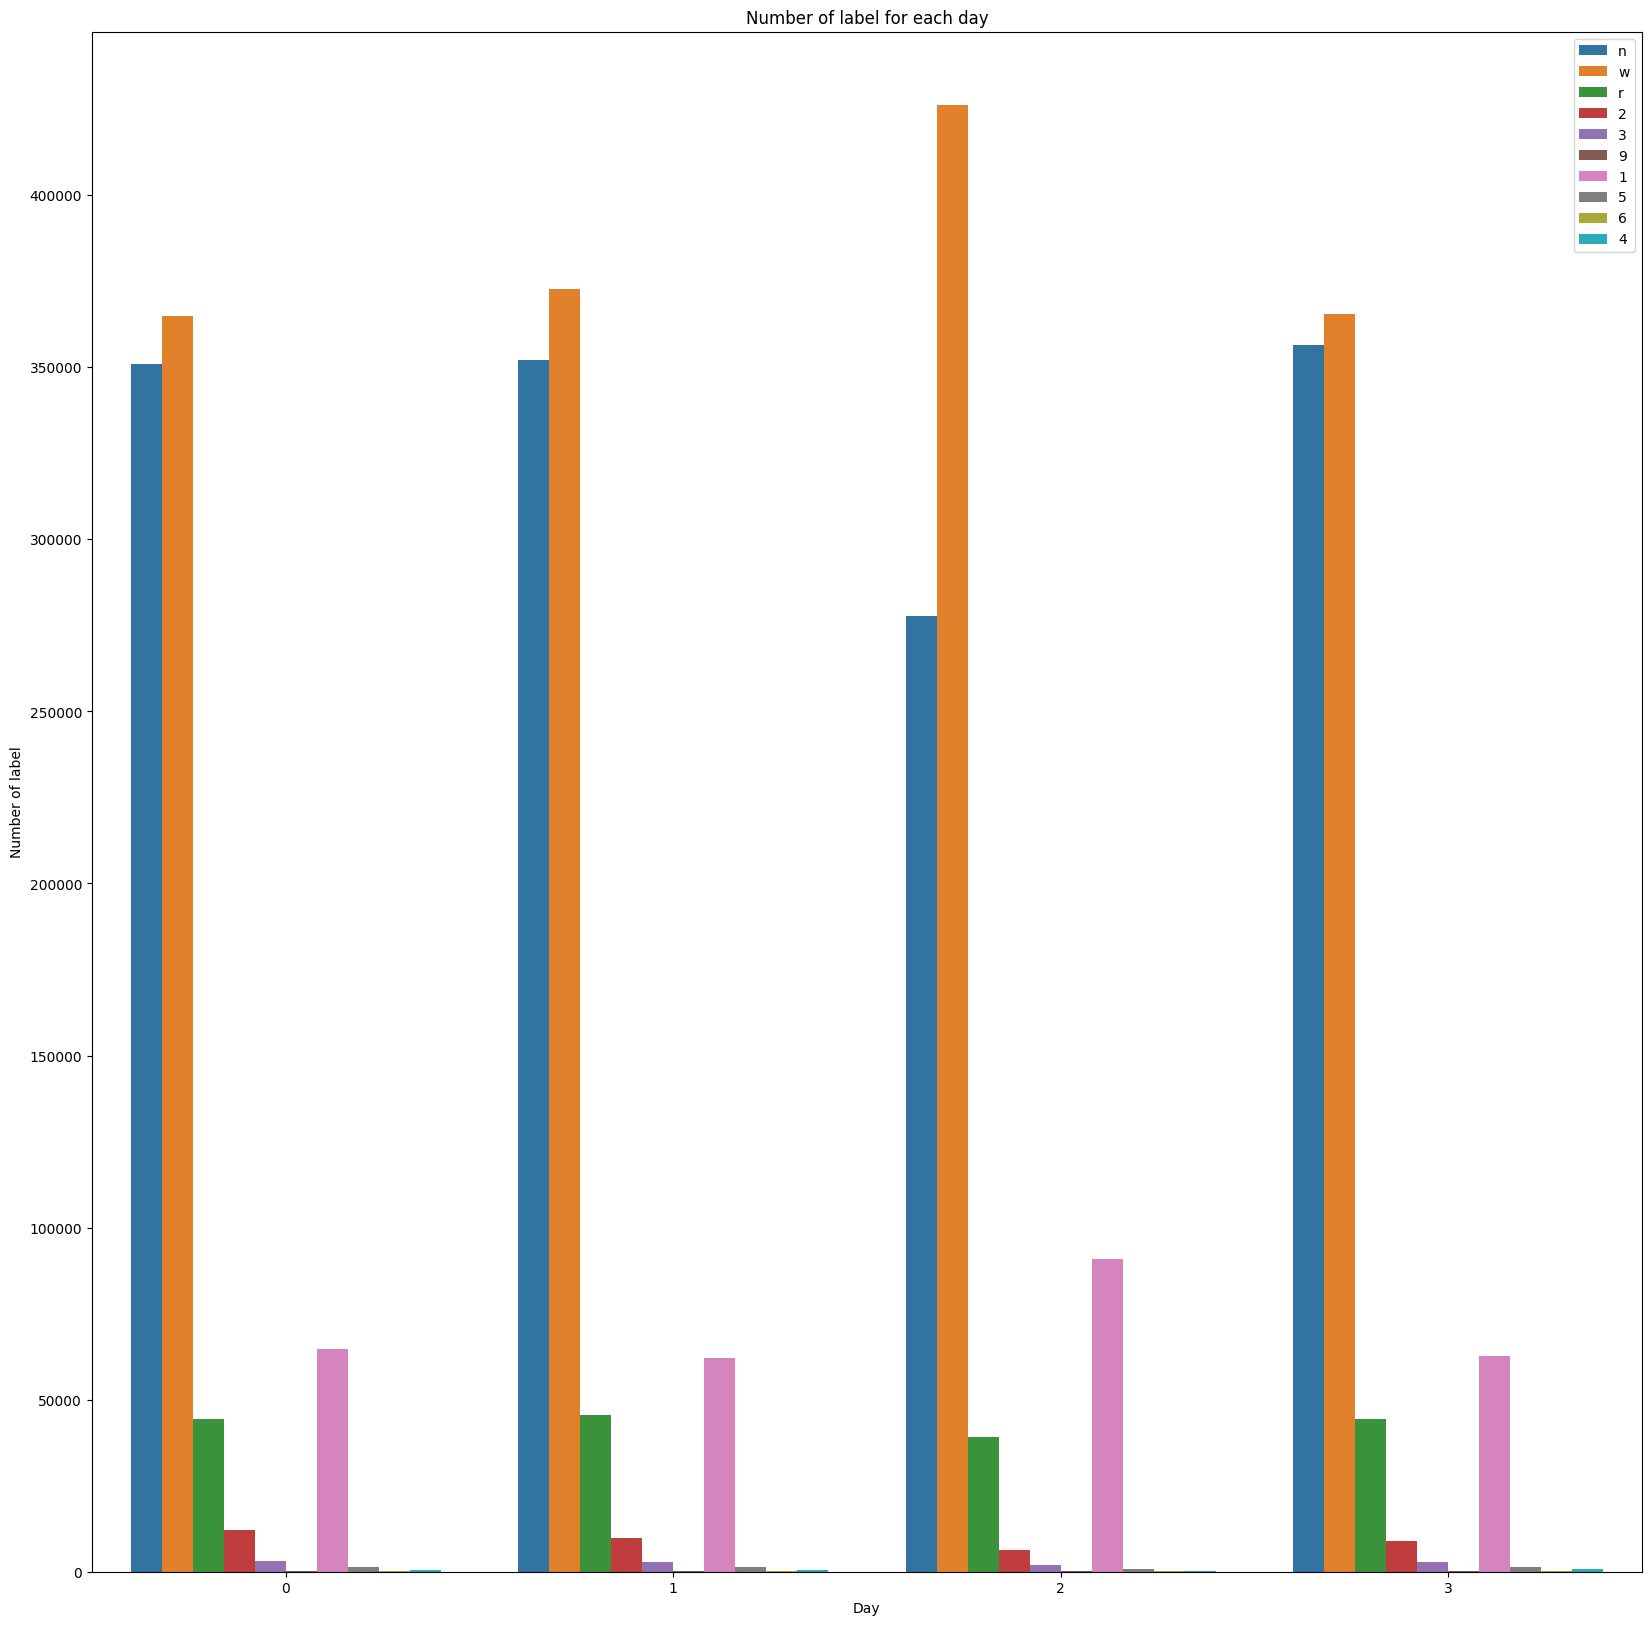

In [28]:
# display the number of label for each day
plt.figure(figsize=(20, 20))
sns.countplot(x='day', hue='label', data=df)
plt.title('Number of label for each day')
plt.xlabel('Day')
plt.ylabel('Number of label')
plt.legend()
plt.show()

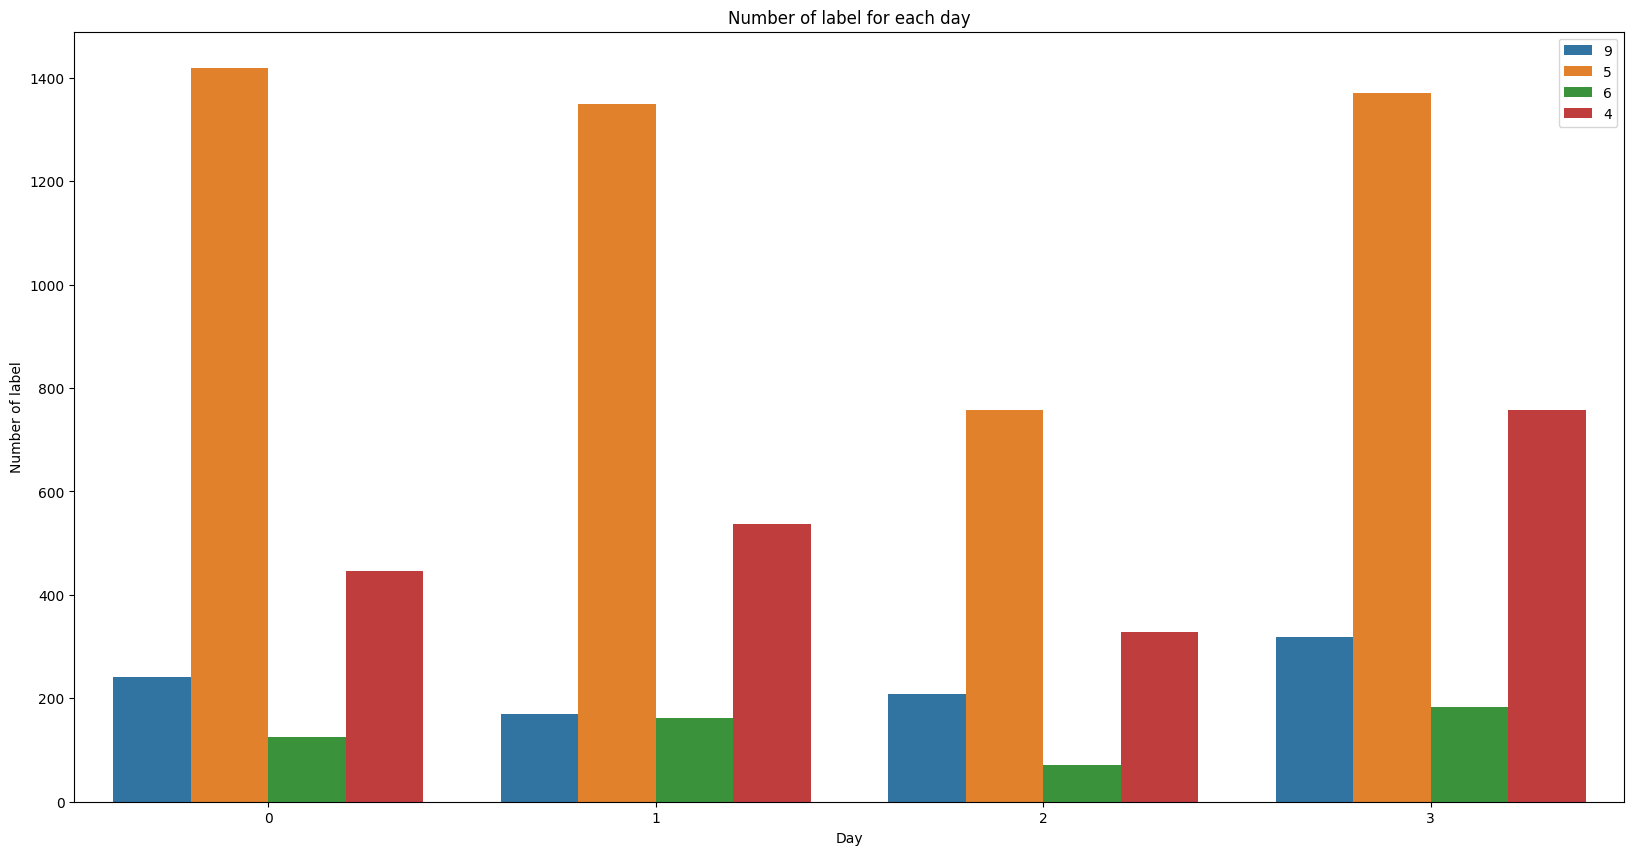

In [26]:
df_other = df[df['label'].isin(['4', '5', '6', '9'])]

plt.figure(figsize=(20, 10))
sns.countplot(x='day', hue='label', data=df_other)
plt.title('Number of label for each day')
plt.xlabel('Day')
plt.ylabel('Number of label')
plt.legend()
plt.show()

In [27]:
df['label'].value_counts()

w    1529516
n    1337654
1     280491
r     173605
2      37482
3      10439
5       4895
4       2069
9        938
6        542
Name: label, dtype: int64

In [30]:
df_day0['label'].value_counts()

w    364982
n    351100
1     64766
r     44320
2     12150
3      3072
5      1418
4       446
9       241
6       126
Name: label, dtype: int64

In [31]:
df_day1['label'].value_counts()

w    372752
n    352151
1     62145
r     45615
2      9879
3      2693
5      1349
4       537
9       170
6       161
Name: label, dtype: int64

In [32]:
df_day2['label'].value_counts()

w    426208
n    277809
1     90756
r     39250
2      6440
3      1917
5       757
4       329
9       208
6        71
Name: label, dtype: int64

In [33]:
df_day3['label'].value_counts()

w    365574
n    356594
1     62824
r     44420
2      9013
3      2757
5      1371
4       757
9       319
6       184
Name: label, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


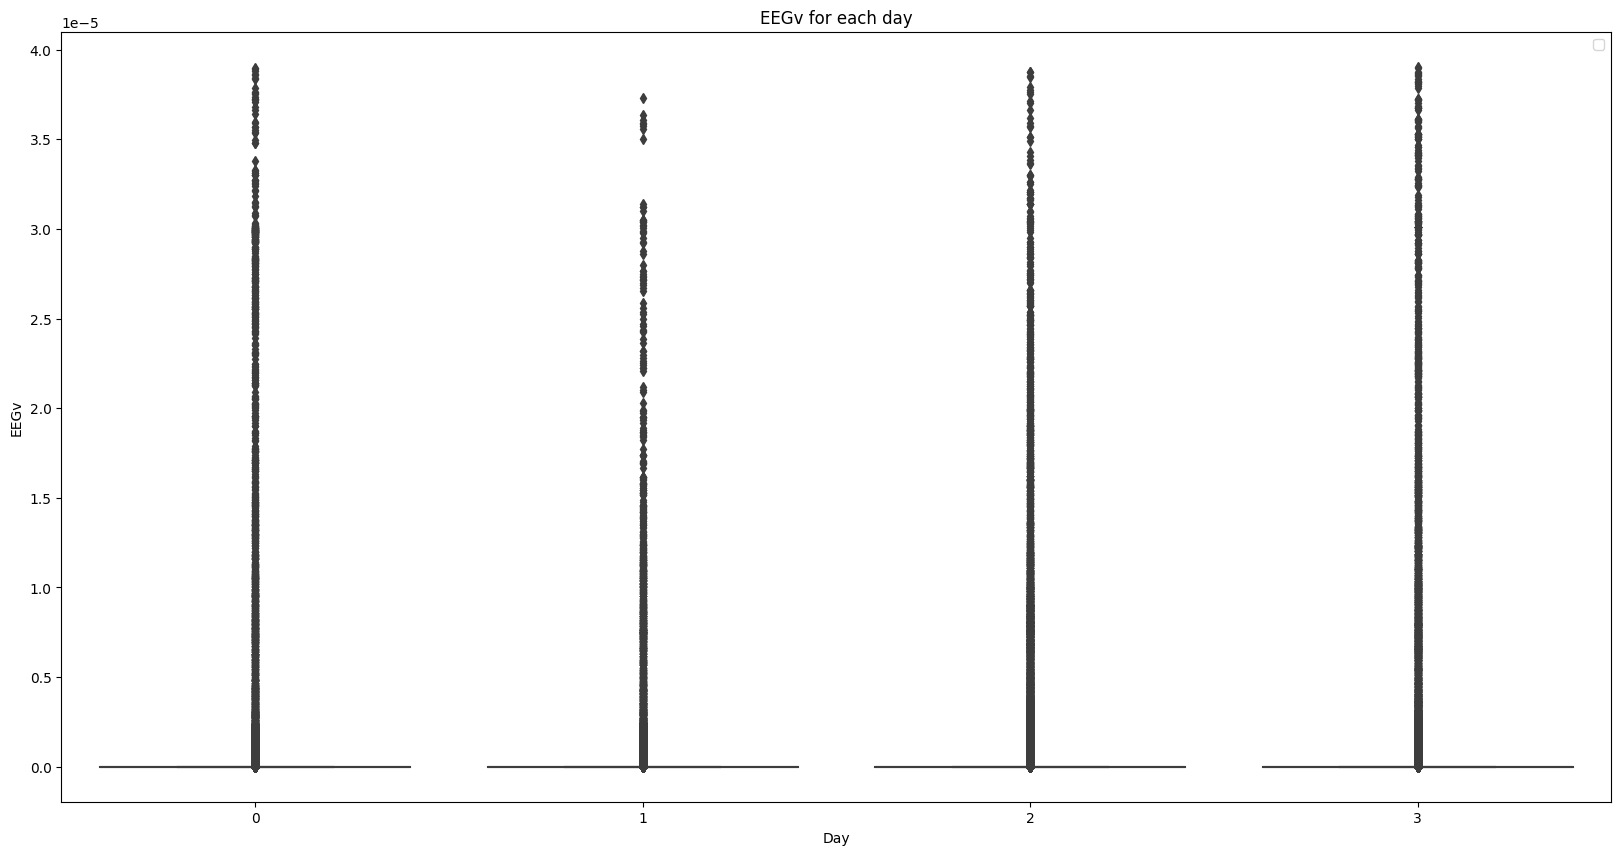

In [35]:
# what's different between day 0 and day 3?
# plot EEGv for each day
plt.figure(figsize=(20, 10))
sns.boxplot(x='day', y='EEGv', data=df)
plt.title('EEGv for each day')
plt.xlabel('Day')
plt.ylabel('EEGv')
plt.legend()
plt.show()
